# California Housing Price Prediction Dataset Overview

## Introduction

This dataset contains information about housing prices in California. The goal is to predict the median house value for households within a block based on various features.

## Key Features

1. **Longitude:** A measure of how far west a house is; a higher value is farther west.
2. **Latitude:** A measure of how far north a house is; a higher value is farther north.
3. **Housing Median Age:** Median age of a house within a block; a lower number is a newer building.
4. **Total Rooms:** Total number of rooms within a block.
5. **Total Bedrooms:** Total number of bedrooms within a block.
6. **Population:** Total number of people residing within a block.
7. **Households:** Total number of households, a group of people residing within a home unit, for a block.
8. **Median Income:** Median income for households within a block of houses (measured in tens of thousands of US Dollars).
9. **Median House Value:** Median house value for households within a block (measured in US Dollars).
10. **Ocean Proximity:** Location of the house with respect to the ocean/sea.

## Data Source

The dataset can be obtained from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data).

## Dataset Exploration

To start working with the dataset, load it into your Jupyter Notebook and explore the first few rows using the following code:

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
df = pd.read_csv("data/california_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Drop null Values

In [5]:
df.dropna(inplace=True)

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df = df[df['ocean_proximity'] != 'ISLAND']

the 'ISLAND' values will be a problem when splitting the data so better drop them now

## Data Preprocessing

In [9]:
x = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(16342, 4086, 16342, 4086)

In [11]:
df_train = X_train.join(y_train)
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19153,-122.71,38.34,23.0,2744.0,588.0,1493.0,557.0,3.1781,<1H OCEAN,162000.0
1215,-120.46,38.09,16.0,3758.0,715.0,1777.0,615.0,3.0000,INLAND,122600.0
14367,-117.24,32.74,43.0,2216.0,375.0,918.0,388.0,5.5289,NEAR OCEAN,297700.0
11776,-121.28,38.76,47.0,2901.0,631.0,1276.0,578.0,2.1366,INLAND,101900.0
13770,-117.02,34.03,19.0,4415.0,648.0,1627.0,619.0,4.2361,INLAND,191600.0


In [12]:
df_train['ocean_proximity'].value_counts()

<1H OCEAN     7246
INLAND        5159
NEAR OCEAN    2107
NEAR BAY      1830
Name: ocean_proximity, dtype: int64

### Transformation Function

In [13]:
def transform_data(df):
    df_t = df.copy()
    
    # Apply log transformation
    for column in ['total_rooms', 'total_bedrooms', 'population', 'households']:
        df_t[column] = np.log(df_t[column] + 1)
    
    # One-hot encode 'ocean_proximity'
    df_t = df_t.join(pd.get_dummies(df_t['ocean_proximity'])).drop('ocean_proximity', axis=1)
    
    # Create new features
    df_t['bedrooms_per_room'] = df_t['total_bedrooms'] / df_t['total_rooms']
    df_t['household_room'] = df_t['households'] / df_t['total_rooms']
    
    return df_t

### Data Visvalization

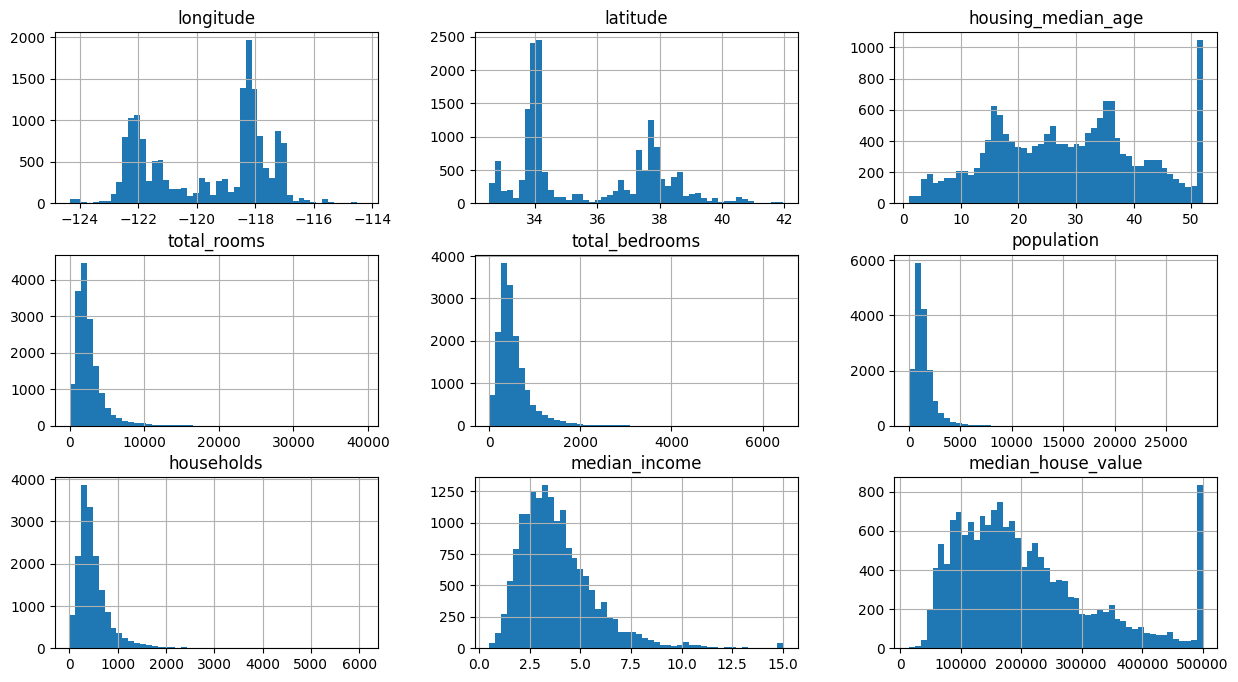

In [14]:
df_train.hist(figsize=(15, 8),bins = 50);

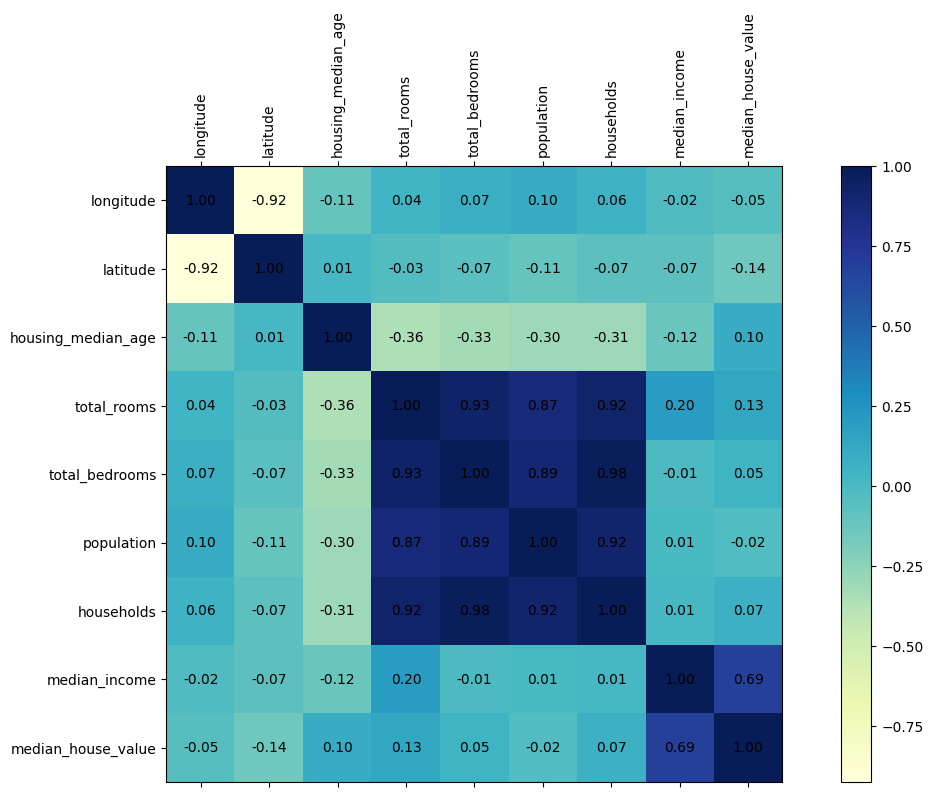

In [15]:
# Select numeric columns
numeric_df = df_train.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 8))

# Create a heatmap using imshow
cax = ax.matshow(corr_matrix, cmap='YlGnBu')

# Add a colorbar
fig.colorbar(cax)

# Set x and y axis labels
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Display the correlation values as annotations
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

### Let's transform our dataframe

In [16]:
df_train = transform_data(X_train.join(y_train))

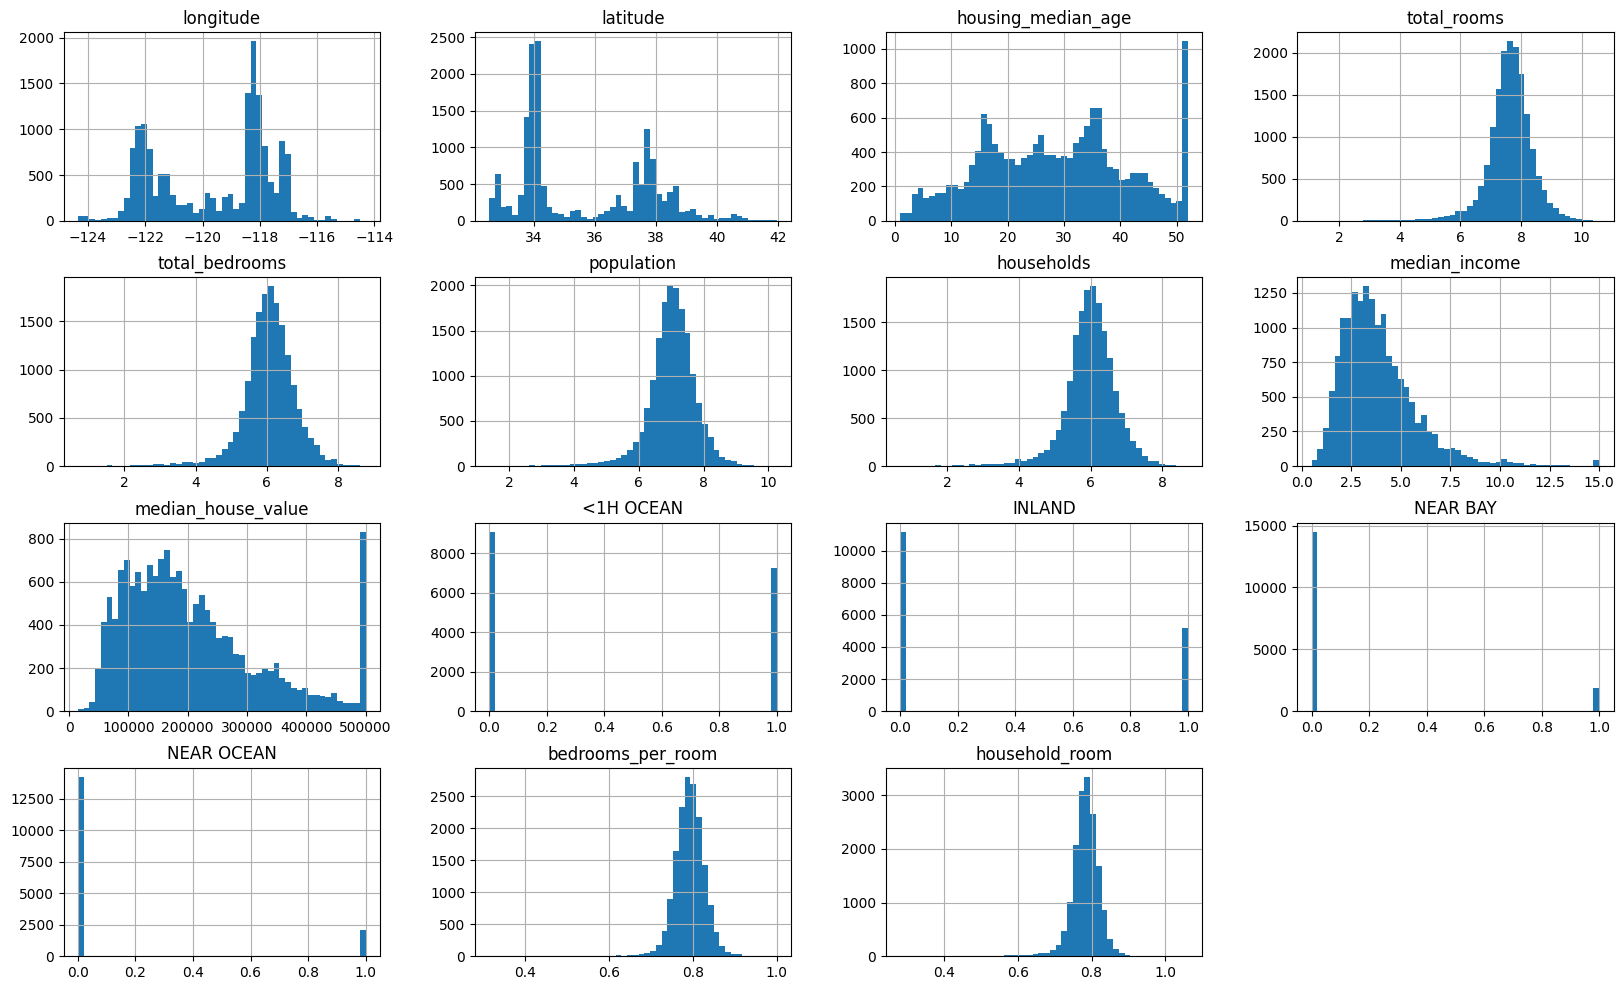

In [17]:
df_train.hist(figsize=(20, 12),bins = 50);

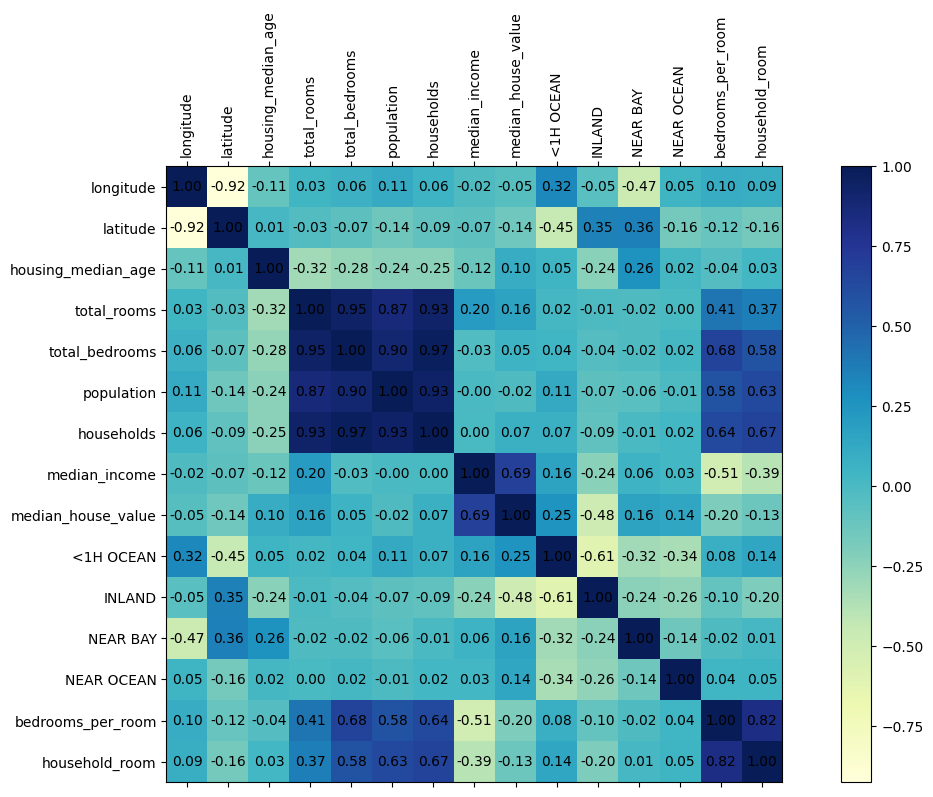

In [18]:
corr_matrix = df_train.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 8))

# Create a heatmap using imshow
cax = ax.matshow(corr_matrix, cmap='YlGnBu')

# Add a colorbar
fig.colorbar(cax)

# Set x and y axis labels
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Display the correlation values as annotations
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

### California Housing Prices on map

In [19]:
import io
import urllib.request
from PIL import Image
import matplotlib.image as mpimg

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename

with urllib.request.urlopen(url) as url_request:
    image_data = url_request.read()

image_data = io.BytesIO(image_data)
california_img = mpimg.imread(image_data, format='png')

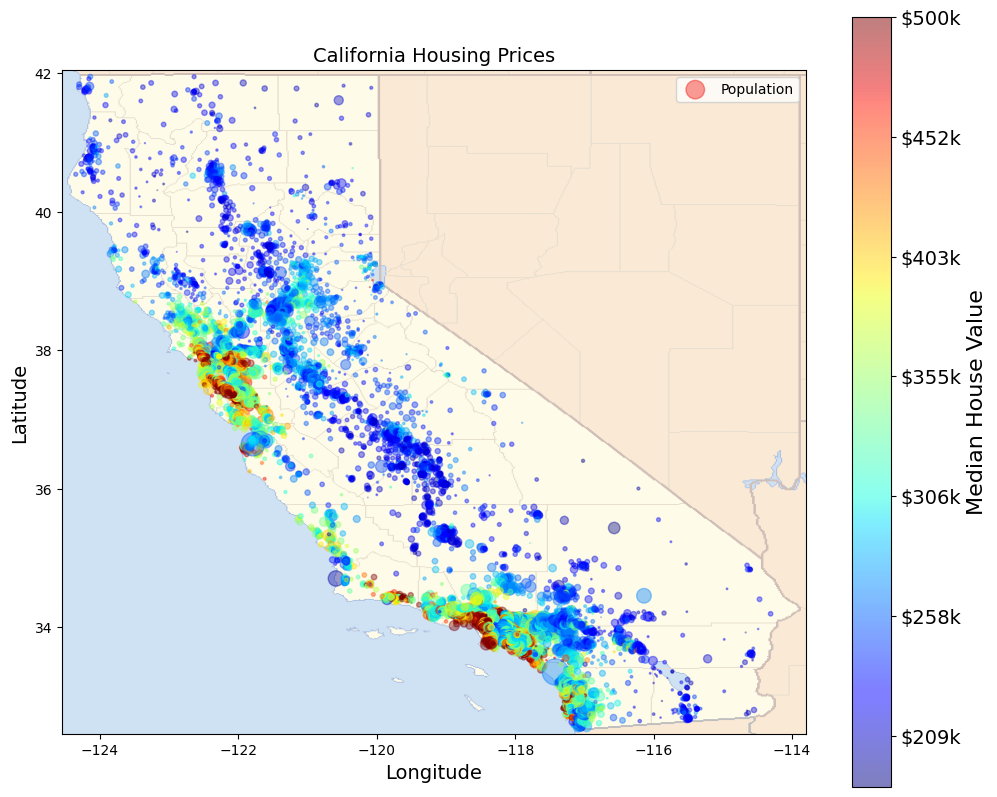

In [20]:
ax = df.plot(kind="scatter", x="longitude", y="latitude", figsize=(12,10),
                  s=df['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.title("California Housing Prices", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.show()

## Training and Selecting a Model

In [21]:
scaler = StandardScaler()

X_train, y_train = df_train.drop('median_house_value', axis=1), df_train['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [22]:
df_test = transform_data(X_test.join(y_test))

In [23]:
X_test, y_test = df_test.drop('median_house_value', axis=1), df_test['median_house_value']

In [24]:
X_test_s = scaler.transform(X_test)

In [25]:
reg.score(X_test_s, y_test)

0.6667564682392061

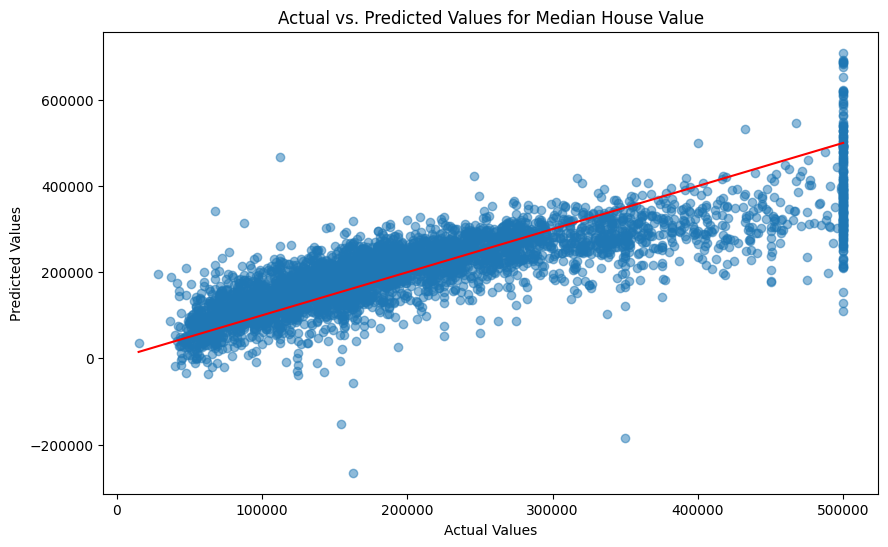

In [26]:
y_pred = reg.predict(X_test_s)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Median House Value')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.show()

In [27]:
forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [28]:
forest.score(X_test_s, y_test)

0.8175016744366941

In [29]:
X_train.columns = X_train.columns.str.replace('<', '')
X_test.columns = X_test.columns.str.replace('<', '')

xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                                n_estimators=300,
                                learning_rate=0.1,
                                max_depth=10,
                                gamma=1,
                                subsample=0.8,
                                colsample_bytree=0.8,
                                )
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 2081960765.5352433


In [30]:
xgb_model.score(X_test, y_test)

0.8429784662658354

## Conclusion

The XGBoost model has achieved an accuracy of approximately 84.29% on the test set. This suggests that the model performs reasonably well in making correct predictions. However, it's crucial to consider additional evaluation metrics, such as precision, recall, and F1-score, especially in scenarios with class imbalance or where specific types of errors have varying impacts.

In further analysis, it's recommended to assess the model's performance in the context of the specific problem domain. Exploring additional metrics and potentially visualizing the results can provide a more comprehensive understanding of the model's strengths and weaknesses.

